In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv("height-weight.csv")

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [5]:
#scatter plot (dagilim grafigi)

Text(0, 0.5, 'height')

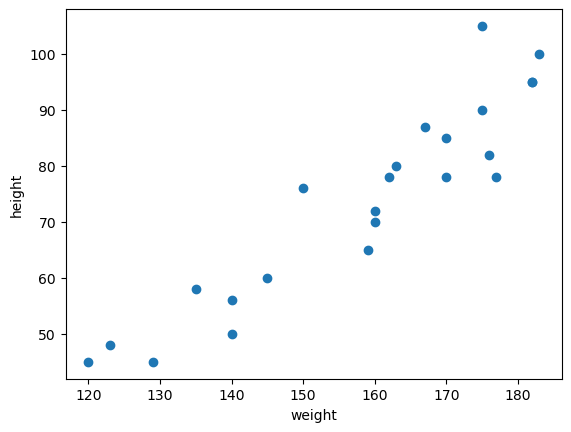

In [6]:
plt.scatter(df["Height"],df["Weight"])
plt.xlabel("weight")
plt.ylabel("height")

In [7]:
#bu ılıskının pozıtıfmı negatıfmı oldugunu ogrenmenın yoluda korelasyonu kullanmamktır

In [8]:
#korelasyon

In [9]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


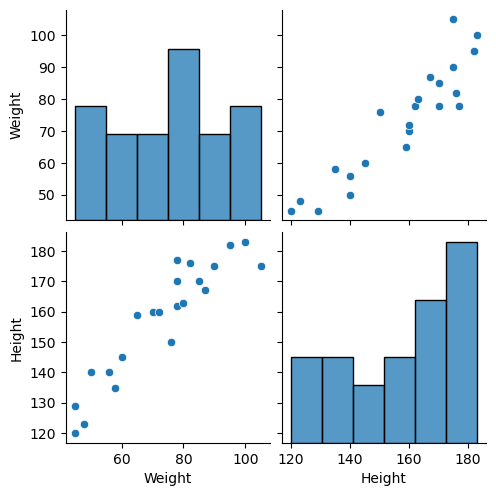

In [10]:
import seaborn as sns
sns.pairplot(df)

In [11]:
#independent and dependent features
x=df[["Weight"]] #bagımısz degısken 2 boyutlu dızı yada df olmalı o yuzden 2 tnae [[]] kullandık yoksa serıes oluyordu
y=df["Height"] #bagımlı degısken tek boyutlu olabılır(series ,tek boyutlu dızı)
#np.array(x) 2 boyutlu dızı olurdu
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [12]:
#np.array(x).shape

In [13]:
x_series=df["Weight"]
np.array(x_series).shape

(23,)

In [14]:
np.array(y).shape

(23,)

In [15]:
#train test split
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [17]:
x_train.shape

(17, 1)

In [18]:
#standartizstion
#ortalama 0 standart sapma 1 olacak sekılde verılerı donusturdu


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()
X_train=scaler.fit_transform(x_train)

In [21]:
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [22]:
#train de fit_transform test de transform 

In [23]:
X_test=scaler.transform(x_test)
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [24]:
#apply  simply linear regression

In [25]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)

In [26]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [27]:
#slope egim intercept kesısısm noktası

In [28]:
print("intercept:",regression.intercept_)

intercept: 156.47058823529412


In [29]:
print("Coefficient or slope :", regression.coef_)

Coefficient or slope : [17.2982057]


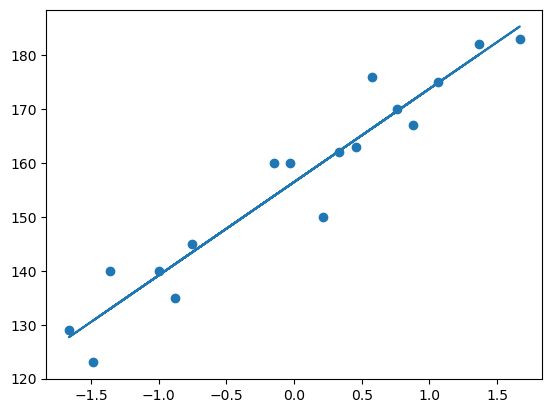

In [31]:
# plot training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [38]:
#prediction for test data
#1.predicted height output=intercept+coef_(weights)
#2.y_pred_test=156.470+1+17.29(X_test)

In [39]:
y_pred=regression.predict(X_test)

In [40]:
#performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [41]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


In [42]:
from sklearn.metrics import r2_score

In [43]:
score=r2_score(y_test,y_pred)

In [44]:
print(score)

0.7360826717981276


In [45]:
# ols linear regression

In [46]:
import statsmodels.api as sm

In [48]:
#endog temel olarak 1 boyutlu terlı yanıt degıskenı anlamına gelır
#xog temel olarak gercek cıktı degıskenı olarak kullanılabılır
model=sm.OLS(y_train,X_train).fit()
prediction=model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [52]:
#print(model.sumarry())

In [54]:
#prediction for new data

In [57]:
regression.predict(scaler.transform([[72]]))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])